# XGBoost

In [260]:
import numpy as np
import pandas as pd

In [261]:
# Đọc dữ liệu từ pandas
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [262]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [263]:
X = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [264]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 31


In [265]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sử dụng OHE để mã hóa các categories của dữ liệu, Label Encode để mã hóa lại đầu ra của y
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [266]:
X_origin = X.copy()
y_origin = y.copy()

In [267]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [268]:
X_encode['Attrition'] = X_encode['Attrition'].map({'Yes':1, 'No':0})

In [269]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,0,279,8,61,5130,24907,1,23,10,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,1392,3,56,2909,23159,1,11,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,40,3468,16632,9,12,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,4,17,17,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,42,9991,21457,4,15,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,87,6142,5174,1,20,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,63,5390,13243,2,14,17,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [270]:
y_encode = label_encoder.fit_transform(y)

In [271]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

<Axes: >

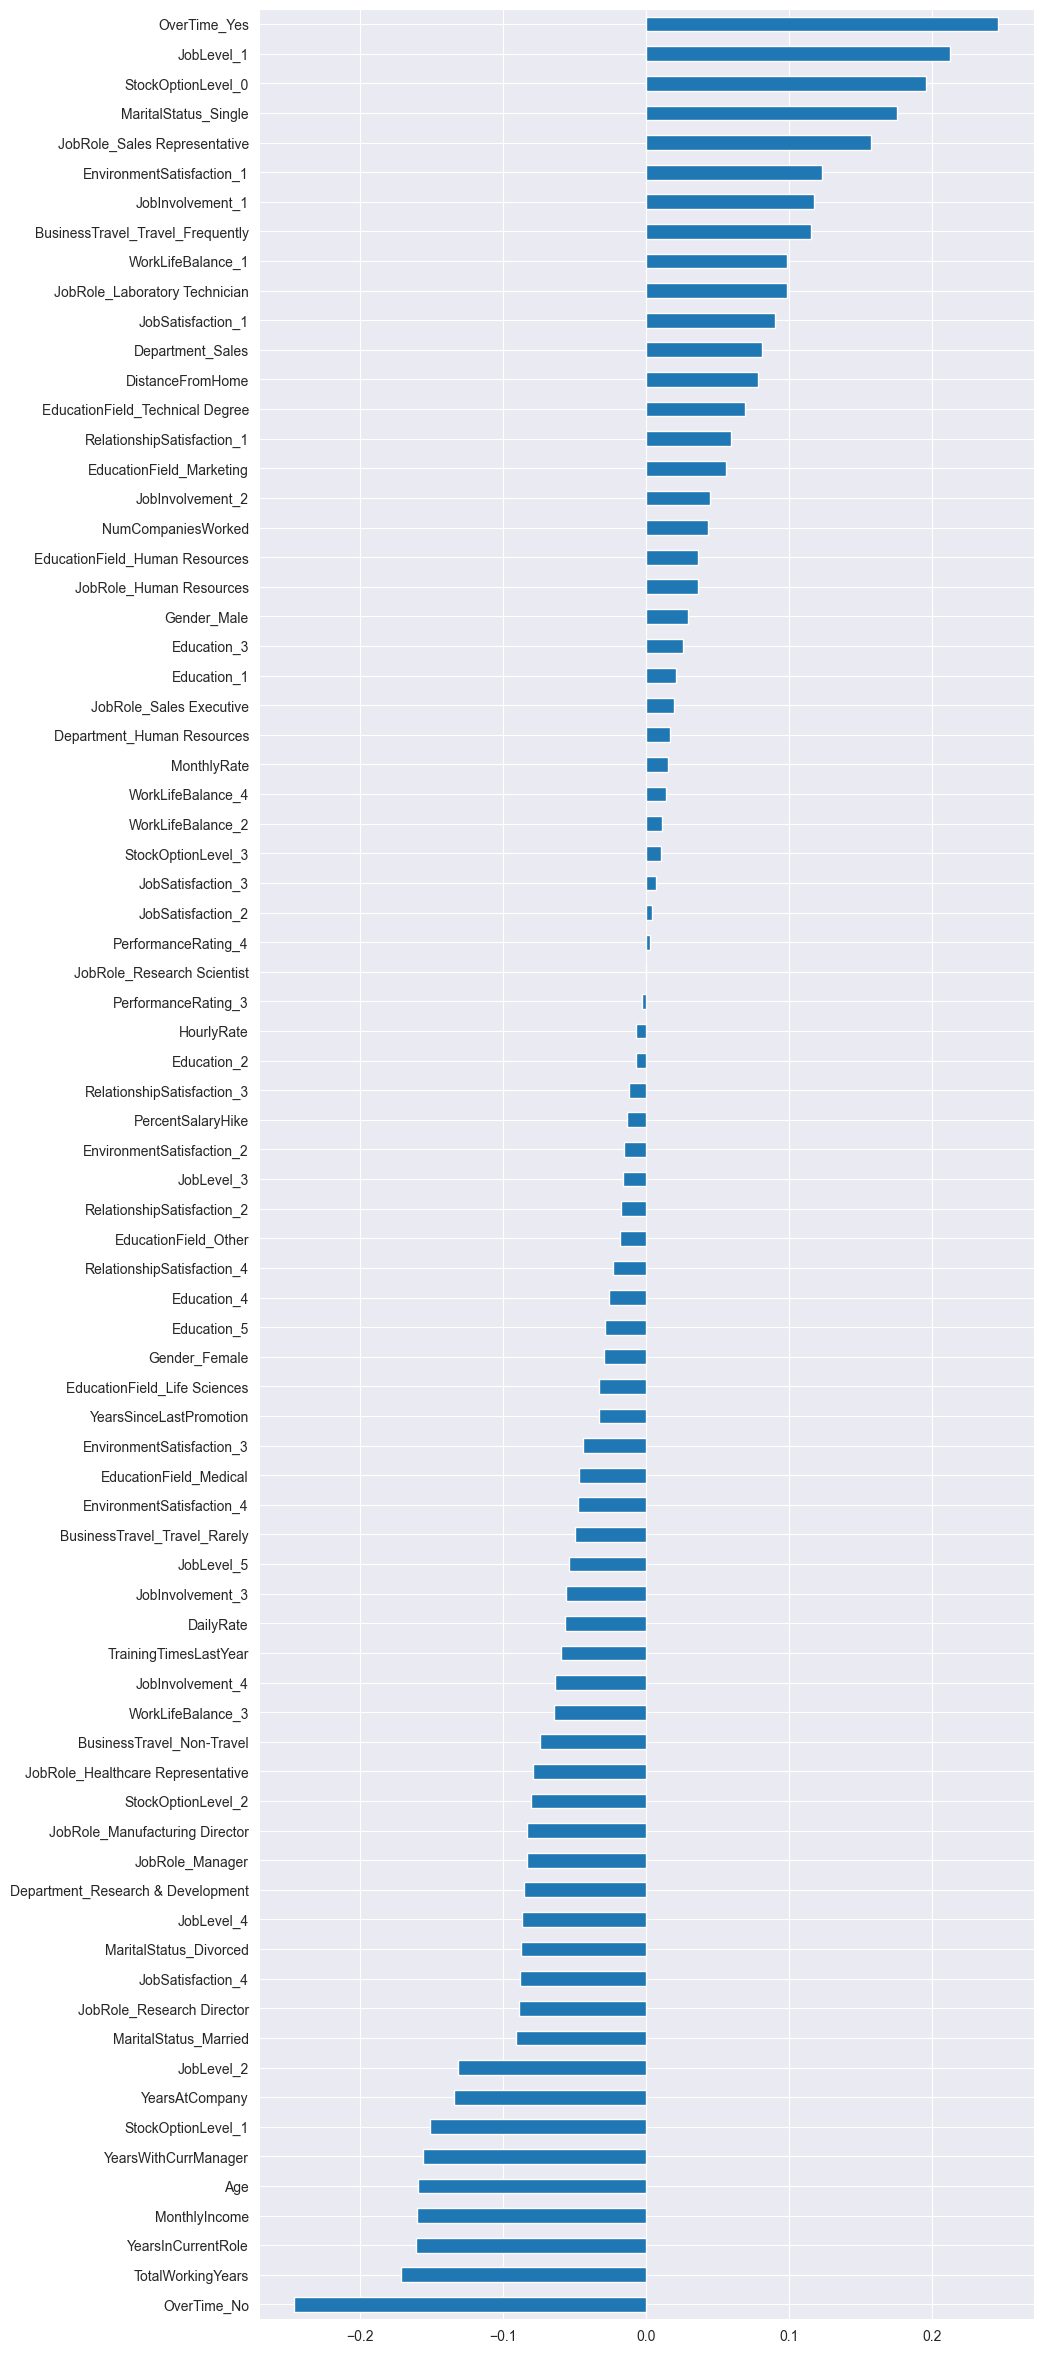

In [272]:
X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [273]:
feature_correlation = X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

59

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

X_encode_copy = X_encode.drop('Attrition', axis=1)
y_encode_copy = y_encode

X_train, X_test, y_train, y_test = train_test_split(X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [275]:
X_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
853,19,645,9,54,2552,7172,1,25,1,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
435,33,1277,15,56,13610,24619,7,12,15,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
587,52,1325,11,82,3149,21821,8,20,9,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1170,27,591,2,87,2580,6297,2,13,6,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,34,303,2,75,2231,11314,6,18,6,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,46,1144,7,30,5258,16044,2,14,7,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
963,38,1009,2,31,6893,19461,3,15,11,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
734,22,217,8,94,2451,6881,1,15,4,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1315,36,430,2,73,6962,19573,4,22,15,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [276]:
from collections import Counter
X_train_balanced

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,19,645,9,54,2552,7172,1,25,1,4,...,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
1,33,1277,15,56,13610,24619,7,12,15,2,...,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
2,52,1325,11,82,3149,21821,8,20,9,3,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
3,27,591,2,87,2580,6297,2,13,6,0,...,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000
4,34,303,2,75,2231,11314,6,18,6,3,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,25,1238,1,57,3096,21873,2,16,7,3,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.787272,0.212728
1290,36,698,14,81,4861,7945,7,13,8,2,...,0.000000,0.000000,0.053805,0.946195,0.0,0.0,0.0,1.000000,0.000000,0.000000
1291,26,336,3,50,2407,5528,5,14,6,2,...,0.781296,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.781296,0.000000,0.218704
1292,39,612,19,69,6206,6285,2,11,7,5,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.000000


In [277]:
print("Before:", Counter(y_train))

print("After: ", Counter(y_train_balanced))

Before: Counter({np.int64(0): 863, np.int64(1): 166})
After:  Counter({np.int64(0): 863, np.int64(1): 431})


In [278]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

class XGBoostFromScratch:
    """
    XGBoost implementation from scratch

    Công thức chính:
    obj = Σ[L(yi, ŷi)] + Σ[Ω(fk)]

    Trong đó:
    - L: Loss function (log loss cho classification)
    - Ω: Regularization term = γT + (1/2)λΣ(w²)
    - T: số lá của cây
    - w: trọng số của mỗi lá
    """

    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_child_weight=1, gamma=0, subsample=1.0,
                 colsample_bytree=1.0, reg_lambda=1, reg_alpha=0,
                 scale_pos_weight=1, random_state=42):
        """
        Parameters:
        -----------
        n_estimators : số lượng cây (boosting rounds)
        learning_rate : tốc độ học (η)
        max_depth : độ sâu tối đa của cây
        min_child_weight : tổng hessian tối thiểu trong node con
        gamma : γ - loss reduction tối thiểu để split
        subsample : tỷ lệ sample cho mỗi cây
        colsample_bytree : tỷ lệ features cho mỗi cây
        reg_lambda : λ - L2 regularization
        reg_alpha : α - L1 regularization
        scale_pos_weight : cân bằng class (cho imbalanced data)
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_child_weight = min_child_weight
        self.gamma = gamma
        self.subsample = subsample
        self.colsample_bytree = colsample_bytree
        self.reg_lambda = reg_lambda
        self.reg_alpha = reg_alpha
        self.scale_pos_weight = scale_pos_weight
        self.random_state = random_state

        self.trees = []
        self.base_prediction = 0

    def _sigmoid(self, x):
        """Sigmoid function: σ(x) = 1 / (1 + e^(-x))"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def _log_loss_gradient(self, y_true, y_pred):
        """
        Gradient của log loss (Cross-entropy)

        Công thức:
        gi = ∂L/∂ŷ = ŷi - yi

        Với ŷi = σ(raw_prediction)
        """
        # Áp dụng scale_pos_weight
        weights = np.where(y_true == 1, self.scale_pos_weight, 1.0)
        probs = self._sigmoid(y_pred)
        gradient = (probs - y_true) * weights
        return gradient

    def _log_loss_hessian(self, y_true, y_pred):
        """
        Hessian của log loss

        Công thức:
        hi = ∂²L/∂ŷ² = ŷi(1 - ŷi)

        Với ŷi = σ(raw_prediction)
        """
        weights = np.where(y_true == 1, self.scale_pos_weight, 1.0)
        probs = self._sigmoid(y_pred)
        hessian = probs * (1 - probs) * weights
        return hessian

    def _calculate_leaf_weight(self, gradient, hessian):
        """
        Tính trọng số tối ưu cho lá

        Công thức XGBoost:
        w* = -Σgi / (Σhi + λ)

        Trong đó:
        - gi: gradient của samples trong lá
        - hi: hessian của samples trong lá
        - λ: L2 regularization
        """
        G = np.sum(gradient)
        H = np.sum(hessian)
        weight = -G / (H + self.reg_lambda)
        return weight

    def _calculate_gain(self, left_grad, left_hess, right_grad, right_hess, parent_grad, parent_hess):
        """
        Tính Gain từ việc split

        Công thức XGBoost:
        Gain = 1/2 * [(GL²/(HL+λ)) + (GR²/(HR+λ)) - (G²/(H+λ))] - γ

        Trong đó:
        - GL, GR: tổng gradient của left/right child
        - HL, HR: tổng hessian của left/right child
        - G, H: tổng gradient/hessian của parent
        - γ: complexity cost (gamma)
        - λ: L2 regularization
        """
        GL = np.sum(left_grad)
        HL = np.sum(left_hess)
        GR = np.sum(right_grad)
        HR = np.sum(right_hess)
        G = np.sum(parent_grad)
        H = np.sum(parent_hess)

        gain = 0.5 * (
            (GL**2 / (HL + self.reg_lambda)) +
            (GR**2 / (HR + self.reg_lambda)) -
            (G**2 / (H + self.reg_lambda))
        ) - self.gamma

        return gain

    def _find_best_split(self, X, gradient, hessian, feature_indices):
        """
        Tìm split tốt nhất dựa trên Gain

        Thuật toán:
        1. Với mỗi feature, thử tất cả các split points
        2. Tính Gain cho mỗi split
        3. Chọn split có Gain cao nhất
        """
        best_gain = -np.inf
        best_feature = None
        best_threshold = None

        for feature_idx in feature_indices:
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            # Thử split tại trung điểm giữa các giá trị unique
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask

                # Kiểm tra min_child_weight
                if np.sum(hessian[left_mask]) < self.min_child_weight:
                    continue
                if np.sum(hessian[right_mask]) < self.min_child_weight:
                    continue

                # Tính Gain
                gain = self._calculate_gain(
                    gradient[left_mask], hessian[left_mask],
                    gradient[right_mask], hessian[right_mask],
                    gradient, hessian
                )

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree(self, X, gradient, hessian, depth=0, feature_indices=None):
        """
        Xây dựng cây quyết định theo thuật toán XGBoost

        Quy trình:
        1. Tìm best split
        2. Nếu không split được → tạo leaf node
        3. Nếu split được → tạo internal node và đệ quy cho left/right
        """
        if feature_indices is None:
            n_features = X.shape[1]
            n_features_sample = int(n_features * self.colsample_bytree)
            feature_indices = np.random.choice(n_features, n_features_sample, replace=False)

        # Điều kiện dừng
        if depth >= self.max_depth or len(X) < 2:
            return {'leaf': True, 'weight': self._calculate_leaf_weight(gradient, hessian)}

        # Tìm best split
        best_feature, best_threshold, best_gain = self._find_best_split(
            X, gradient, hessian, feature_indices
        )

        # Nếu không tìm được split tốt
        if best_feature is None or best_gain <= 0:
            return {'leaf': True, 'weight': self._calculate_leaf_weight(gradient, hessian)}

        # Tạo left và right children
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_child = self._build_tree(
            X[left_mask], gradient[left_mask], hessian[left_mask],
            depth + 1, feature_indices
        )
        right_child = self._build_tree(
            X[right_mask], gradient[right_mask], hessian[right_mask],
            depth + 1, feature_indices
        )

        return {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_child,
            'right': right_child
        }

    def _predict_tree(self, tree, X):
        """Dự đoán sử dụng một cây"""
        if tree['leaf']:
            return np.full(len(X), tree['weight'])

        left_mask = X[:, tree['feature']] <= tree['threshold']
        predictions = np.zeros(len(X))

        if np.any(left_mask):
            predictions[left_mask] = self._predict_tree(tree['left'], X[left_mask])
        if np.any(~left_mask):
            predictions[~left_mask] = self._predict_tree(tree['right'], X[~left_mask])

        return predictions

    def fit(self, X, y):
        """
        Huấn luyện XGBoost

        Thuật toán:
        1. Khởi tạo prediction = 0 (hoặc log(pos/neg))
        2. For t = 1 to n_estimators:
            a. Tính gradient và hessian
            b. Xây dựng cây mới để fit residuals
            c. Cập nhật prediction += learning_rate * tree_prediction
        """
        np.random.seed(self.random_state)
        X = np.array(X)
        y = np.array(y)

        # Khởi tạo base prediction
        # Sử dụng log-odds cho binary classification
        pos_count = np.sum(y == 1)
        neg_count = np.sum(y == 0)
        self.base_prediction = np.log((pos_count + 1e-10) / (neg_count + 1e-10))

        # Prediction hiện tại (raw score, chưa qua sigmoid)
        current_predictions = np.full(len(y), self.base_prediction)

        # Training loop
        for i in range(self.n_estimators):
            # Subsample
            if self.subsample < 1.0:
                n_samples = int(len(X) * self.subsample)
                sample_indices = np.random.choice(len(X), n_samples, replace=False)
                X_sample = X[sample_indices]
                y_sample = y[sample_indices]
                pred_sample = current_predictions[sample_indices]
            else:
                X_sample = X
                y_sample = y
                pred_sample = current_predictions

            # Tính gradient và hessian
            gradient = self._log_loss_gradient(y_sample, pred_sample)
            hessian = self._log_loss_hessian(y_sample, pred_sample)

            # Xây dựng cây mới
            tree = self._build_tree(X_sample, gradient, hessian)
            self.trees.append(tree)

            # Cập nhật predictions
            tree_predictions = self._predict_tree(tree, X)
            current_predictions += self.learning_rate * tree_predictions

            # In progress (optional)
            if (i + 1) % 20 == 0:
                train_probs = self._sigmoid(current_predictions)
                train_preds = (train_probs >= 0.5).astype(int)
                acc = accuracy_score(y, train_preds)
                print(f"Iteration {i+1}/{self.n_estimators} - Train Accuracy: {acc:.4f}")

        return self

    def predict_proba(self, X):
        """Dự đoán xác suất"""
        X = np.array(X)
        raw_predictions = np.full(len(X), self.base_prediction)

        for tree in self.trees:
            tree_predictions = self._predict_tree(tree, X)
            raw_predictions += self.learning_rate * tree_predictions

        probs = self._sigmoid(raw_predictions)
        return np.vstack([1 - probs, probs]).T

    def predict(self, X):
        """Dự đoán class"""
        probs = self.predict_proba(X)[:, 1]
        return (probs >= 0.5).astype(int)

In [279]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    """Hàm đánh giá mô hình"""
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}\n")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [280]:
# before tối ưu
# xgb_scratch = XGBoostFromScratch(
#         n_estimators=100,
#         learning_rate=0.1,
#         max_depth=3,
#         min_child_weight=5,
#         gamma=0.1,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         reg_lambda=1,
#         scale_pos_weight=5.67,  # 863/166 ≈ 5.67
#         random_state=42
#     )

# after tối ưu
# xgb_scratch = XGBoostFromScratch(
#     n_estimators=50,           # Giảm overfitting
#     learning_rate=0.05,        # Học chậm hơn
#     max_depth=3,
#     min_child_weight=10,       # Tăng regularization
#     gamma=0.5,                 # Tăng complexity cost
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_lambda=2,              # Tăng L2
#     scale_pos_weight=1,        # Không cần nữa vì đã SMOTE
#     random_state=42
# )

# xgb_scratch = XGBoostFromScratch(
#     n_estimators=50,           # Giảm overfitting
#     learning_rate=0.05,        # Học chậm hơn
#     max_depth=3,
#     min_child_weight=10,       # Tăng regularization
#     gamma=0.5,                 # Tăng complexity cost
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_lambda=2,              # Tăng L2
#     scale_pos_weight=4,        # Không cần nữa vì đã SMOTE
#     random_state=42
# )

xgb_scratch = XGBoostFromScratch(
    n_estimators=80,           #  Tăng số cây
    learning_rate=0.05,
    max_depth=4,               #  Tăng depth
    min_child_weight=5,        #  Giảm constraint
    gamma=0.3,                 #  Giảm penalty
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=1,              #  Giảm L2
    scale_pos_weight=3,
    random_state=42
)

print("\nTraining XGBoost from scratch...")
xgb_scratch.fit(X_train_balanced, y_train_balanced)

# # Evaluate
# print("\n" + "="*70)
# evaluate(xgb_scratch, X_train, X_test, y_train, y_test)
# Tìm threshold tối ưu
y_test_proba = xgb_scratch.predict_proba(X_test)[:, 1]

best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.2, 0.6, 0.05):
    y_pred = (y_test_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nOptimal threshold: {best_threshold}")
print(f"Best F1-score: {best_f1:.4f}")

# Evaluate với threshold tối ưu
y_test_pred_optimal = (y_test_proba >= best_threshold).astype(int)

print("\n" + "="*70)
print("IMPROVED RESULTS:")
print("="*70)
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred_optimal)}")
print(f"ACCURACY: {accuracy_score(y_test, y_test_pred_optimal):.4f}")
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred_optimal))


Training XGBoost from scratch...
Iteration 20/80 - Train Accuracy: 0.9173
Iteration 40/80 - Train Accuracy: 0.9297
Iteration 60/80 - Train Accuracy: 0.9413
Iteration 80/80 - Train Accuracy: 0.9444

Optimal threshold: 0.5499999999999999
Best F1-score: 0.5280

IMPROVED RESULTS:
CONFUSION MATRIX:
[[349  21]
 [ 38  33]]
ACCURACY: 0.8662

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       370
           1       0.61      0.46      0.53        71

    accuracy                           0.87       441
   macro avg       0.76      0.70      0.73       441
weighted avg       0.86      0.87      0.86       441



In [281]:
scores_dict = {}
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_scratch.predict_proba(X_train)[:, 1]),
    'Test': roc_auc_score(y_test, xgb_scratch.predict_proba(X_test)[:, 1]),
}

print("\n" + "="*70)
print("ROC AUC SCORES:")
print("="*70)
print(pd.DataFrame(scores_dict))


ROC AUC SCORES:
        XGBoost
Train  0.973768
Test   0.798097


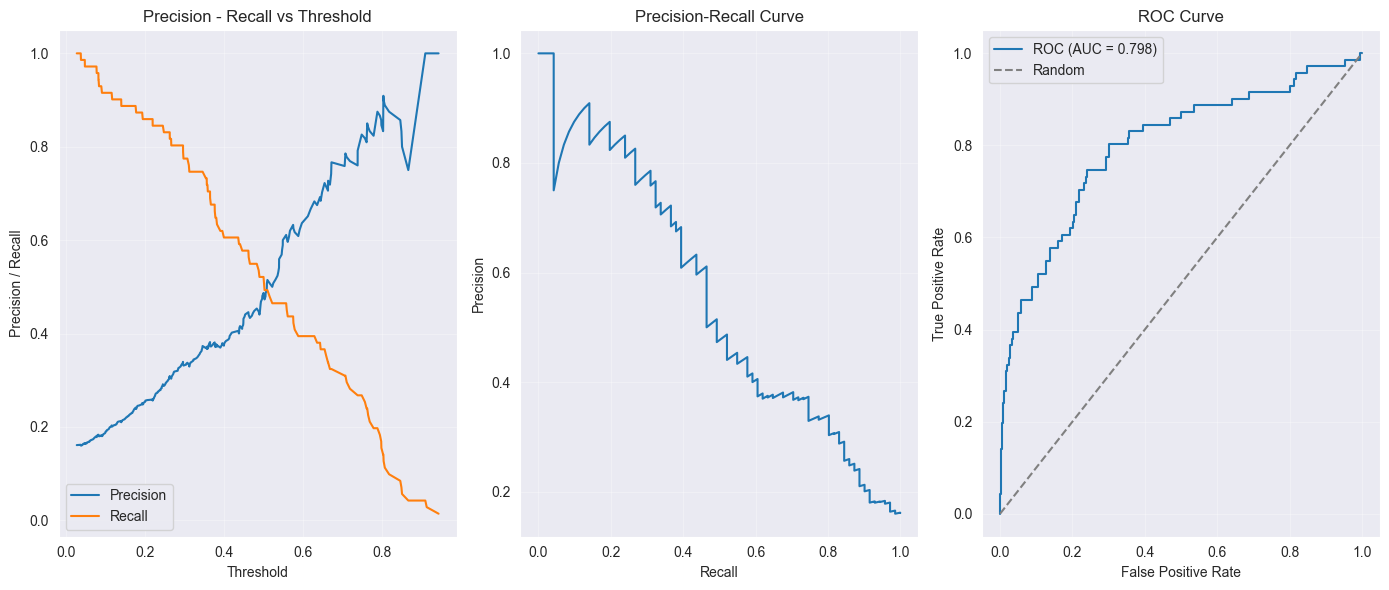

In [282]:
y_scores = xgb_scratch.predict_proba(X_test)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(14, 6))

# 1. Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precision vs Recall (PR Curve)
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, alpha=0.3)

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [283]:
# df = pd.DataFrame({
#     'feature': X_encode_copy.columns,
#     'importance': xgb_scratch.feature_importances_
# }).sort_values('importance', ascending=False)[:40]
#
# df.set_index('feature', inplace=True)
# df.plot(kind='barh', figsize=(10, 10))
# plt.title('Feature Importance according to Random Forest')
# plt.show()